In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from transformers import AutoTokenizer, AutoModel

<AxesSubplot:xlabel='step'>

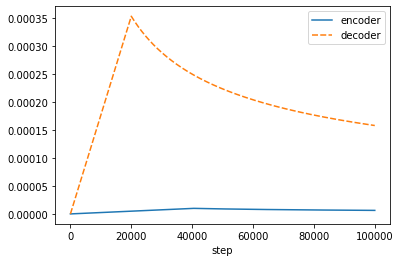

In [32]:
def calc_lr(lr = 2e-3, warmup = 10000, steps = 100000):
    steps = np.arange(steps)
    effective_lr = np.array([lr * min((step + 1) ** (-.5), (step + 1) * warmup ** (-1.5)) for step in steps])
    return pd.DataFrame(dict(step=steps, lr=effective_lr))

enc_lr = calc_lr(lr=2e-3, warmup=40000, steps=100000)
dec_lr = calc_lr(lr=0.05, warmup=20000, steps=100000)

data = pd.DataFrame(index=enc_lr['step'], data=dict(encoder=enc_lr['lr'], decoder=dec_lr['lr']))
sns.lineplot(data=data)

In [3]:
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
dbert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [8]:
s = "The capital of France is [SEP] [CLS] [MASK]."
bert_tokenizer(s)

{'input_ids': [101, 1996, 3007, 1997, 2605, 2003, 102, 101, 103, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [9]:
dbert_tokenizer(s)

{'input_ids': [101, 1996, 3007, 1997, 2605, 2003, 102, 101, 103, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-german-dbmdz-uncased')
dbert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-german-cased')
electra_tokenizer = AutoTokenizer.from_pretrained('german-nlp-group/electra-base-german-uncased')

Downloading:   0%|          | 0.00/467 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/276k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/103 [00:00<?, ?B/s]

In [12]:
electra = AutoModel.from_pretrained('german-nlp-group/electra-base-german-uncased')

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at german-nlp-group/electra-base-german-uncased were not used when initializing ElectraModel: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
electra.embeddings.word_embeddings.weight.shape

torch.Size([32767, 768])

In [16]:
dbert = AutoModel.from_pretrained('distilbert-base-german-cased')
dbert.embeddings.word_embeddings.weight.shape

Some weights of the model checkpoint at distilbert-base-german-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([31102, 768])

In [20]:
steps = np.arange(20)
[i for i in steps]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]